# An application of Classification Algorithms in Python

In [73]:
#importing necessary libraries
#import sys
#!{sys.executable} -m pip install statsmodels

import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as mplt
import seaborn as sns
import dexplot as dxp
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score,precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler as scalar
import statsmodels.api as sma

Importing the dataset

In [74]:
rd.seed(123)
df_raw = pd.read_csv(r'C:\Users\Saheli\Desktop\self project\diabetes health ind.csv')

In [75]:
df_raw.shape

(253680, 22)

In [76]:
df_raw.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [77]:
df_raw.head(20)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [78]:
df_raw.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [79]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [80]:
df_raw.dtypes.value_counts()

float64    22
dtype: int64

Processing of Variables

All the variables except for 'BMI' are categorical. So we need to convert them into factors.

In [81]:
cols = df_raw.columns.drop(['BMI'])
df_raw[cols]=df_raw[cols].astype('category')
df_raw.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

Target Variable

Text(0.5, 0, 'Diabetes_012')

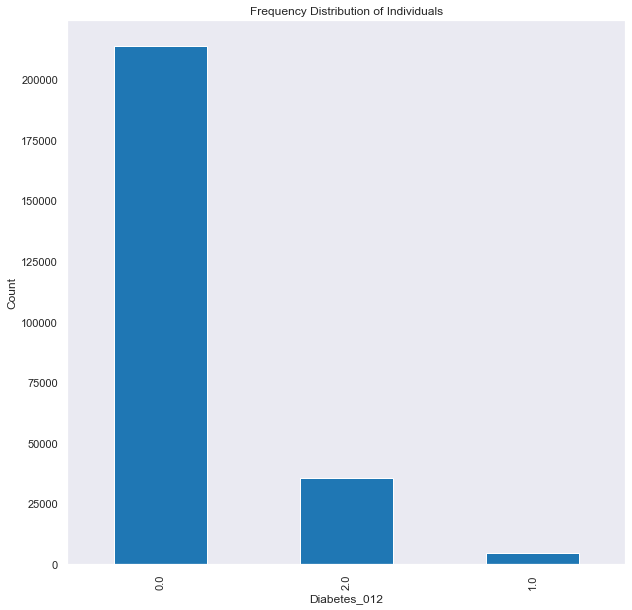

In [82]:
df_raw['Diabetes_012'].value_counts().plot(kind='bar')
mplt.title('Frequency Distribution of Individuals')
mplt.ylabel('Count')
mplt.xlabel('Diabetes_012')

We notice that there are very few observations on Pre diabetes patients. So we merge group 2 and 1 together and plot them.

Text(0.5, 0, 'Diabetes_012')

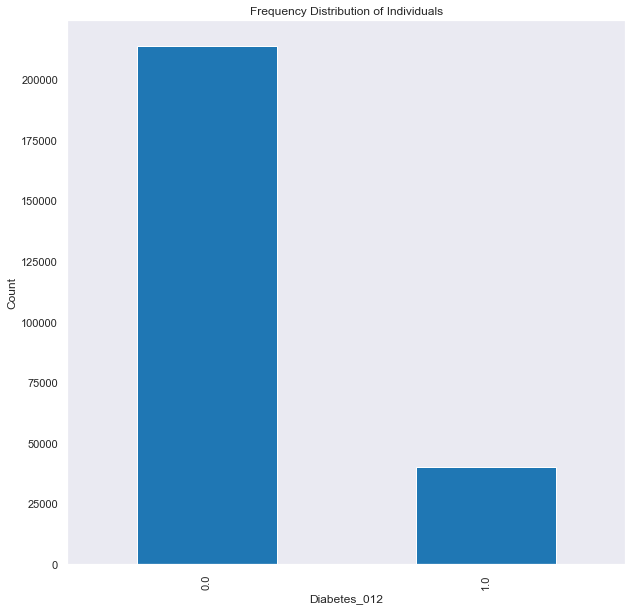

In [83]:
df_raw['Diabetes_012'] = df_raw['Diabetes_012'].apply(lambda x: 1 if x ==2 else x)
df_raw['Diabetes_012'].value_counts().plot(kind='bar')
mplt.title('Frequency Distribution of Individuals')
mplt.ylabel('Count')
mplt.xlabel('Diabetes_012')

In [84]:
df_raw['Diabetes_012']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    1.0
253677    0.0
253678    0.0
253679    1.0
Name: Diabetes_012, Length: 253680, dtype: float64

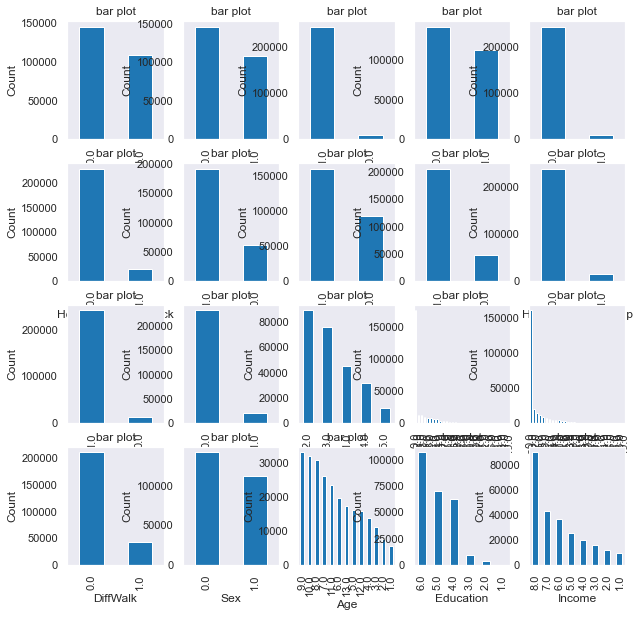

In [85]:
mplt.rcParams['figure.figsize'] = [25, 25]
cols2 = cols.drop('Diabetes_012')
for i in range(0,len(cols2)):
    mplt.subplot(4, 5, i+1)
    df_raw[cols2[i]].value_counts().plot(kind='bar')
    mplt.title('bar plot')
    mplt.ylabel('Count')
    mplt.xlabel(cols2[i])

mplt.show()

Text(0.5, 0, 'BMI')

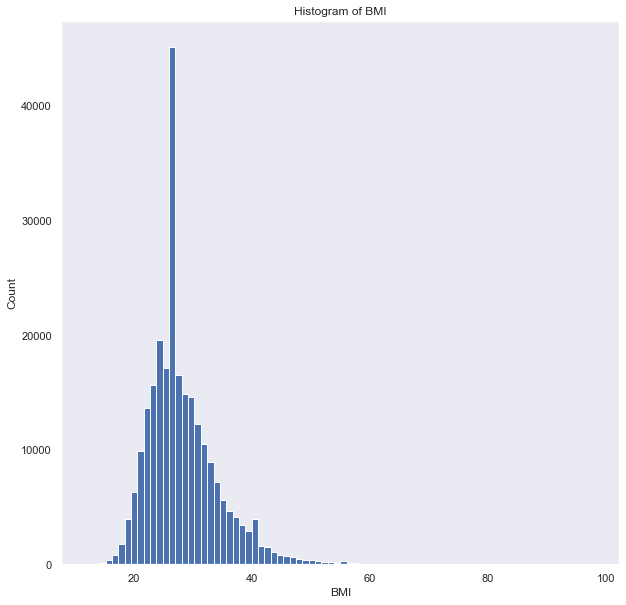

In [86]:
mplt.rcParams['figure.figsize'] = [10, 10]
df_raw['BMI'].plot.hist(bins=80)
mplt.title('Histogram of BMI')
mplt.ylabel('Count')
mplt.xlabel('BMI')

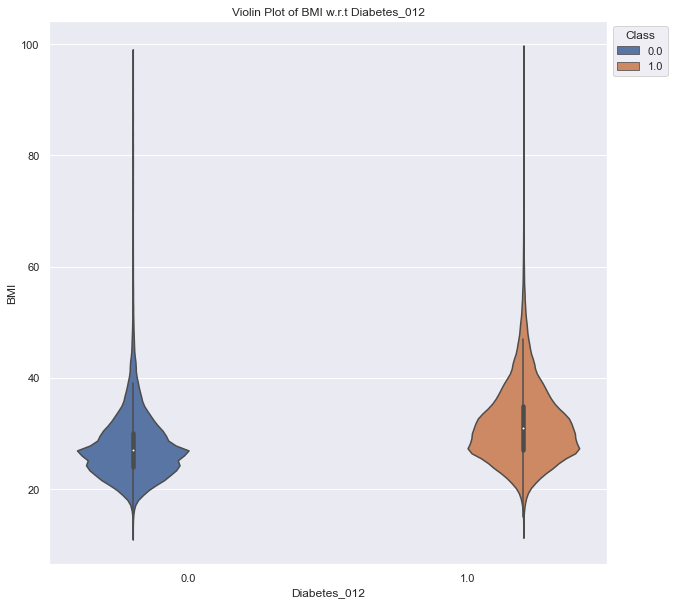

In [87]:
def violin_func(var):
    p = sns.violinplot(data=df_raw, x=var, y='BMI', hue=var)
    p.set(title=f'Violin Plot of BMI w.r.t {var}')
    p.legend(title='Class', bbox_to_anchor=(1, 1), loc='upper left')
violin_func('Diabetes_012')
    

Multiple bar diagram for Categorical variables

C:\Users\Saheli\anaconda3\lib\site-packages\dexplot\_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


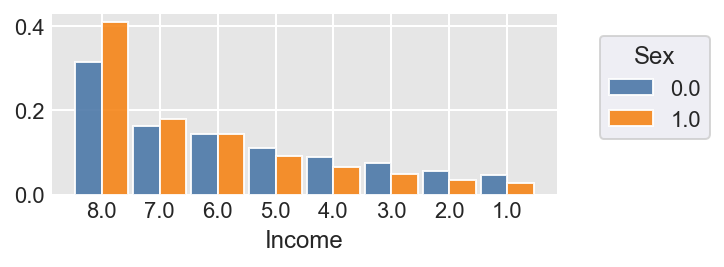

In [88]:
dxp.count('Income', data=df_raw, split='Sex',normalize='Sex')
    

Association between the categorical variables:

In [89]:
d = pd.DataFrame(columns=['Variable', 'Statistics', 'P-Val'], index=range(1, len(df_raw.columns)-1))

for i in range(1, len(df_raw.columns)-1):
    stat, pval = chi2_contingency(pd.crosstab(df_raw.iloc[:, 0], df_raw.iloc[:, i], margins=False))[0:2]
    d.loc[i, 'Variable'] = 'Diabetes - ' + str(df_raw.columns[i])
    d.loc[i, 'Statistics'] = stat
    d.loc[i, 'P-Val'] = pval
    
     
d

,Variable,Statistics,P-Val
1,Diabetes - HighBP,18537.573861,0.0
2,Diabetes - HighChol,11217.003933,0.0
3,Diabetes - CholCheck,1167.849165,0.0
4,Diabetes - BMI,15711.174603,0.0
5,Diabetes - Smoker,999.414764,0.0
6,Diabetes - Stroke,2784.703927,0.0
7,Diabetes - HeartDiseaseorAttack,7939.890468,0.0
8,Diabetes - PhysActivity,3737.448802,0.0
9,Diabetes - Fruits,449.122744,0.0
10,Diabetes - Veggies,889.218416,0.0


Balancing

In [90]:


x = df_raw.drop(['Diabetes_012'],axis=1)
y = df_raw['Diabetes_012']

m_gen = {"1": [1,2,3], "2": [4,5]}
m2_gen= {v: k for k,vv in m_gen.items() for v in vv}
x.GenHlth.map(m2_gen).astype("category")

m_mp = {"1": list(range(0,11)), "2": list(range(11,21)), "3": list(range(21,31)) }
m2_mp= {v: k for k,vv in m_mp.items() for v in vv}
x['MentHlth']=x.MentHlth.map(m2_mp).astype("category")
x['PhysHlth']=x.PhysHlth.map(m2_mp).astype("category")

m_age = {"1": list(range(1,5)), "2": list(range(5,10)), "3": list(range(10,14)) }
m2_age= {v: k for k,vv in m_age.items() for v in vv}
x['Age']=x.Age.map(m2_age).astype("category")

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HighBP                253680 non-null  category
 1   HighChol              253680 non-null  category
 2   CholCheck             253680 non-null  category
 3   BMI                   253680 non-null  float64 
 4   Smoker                253680 non-null  category
 5   Stroke                253680 non-null  category
 6   HeartDiseaseorAttack  253680 non-null  category
 7   PhysActivity          253680 non-null  category
 8   Fruits                253680 non-null  category
 9   Veggies               253680 non-null  category
 10  HvyAlcoholConsump     253680 non-null  category
 11  AnyHealthcare         253680 non-null  category
 12  NoDocbcCost           253680 non-null  category
 13  GenHlth               253680 non-null  category
 14  MentHlth              253680 non-nul

In [91]:
my_list = list(x.columns)

# Elements to identify the indices
elements_to_remove = ['BMI']

# Get the indices of the elements
indices = [index for index, value in enumerate(my_list) if value in elements_to_remove]

# Remove the elements from the list
indices_cat = [x for x in list(range(len(x.columns))) if x not in indices]

indices_cat


[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [92]:
sm = SMOTENC(categorical_features=indices_cat,random_state = 2, sampling_strategy = .8)
x_res, y_res = sm.fit_resample(x, y)

## Model fitting

#### Train Test Split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=123)

### LOGISTIC

In [22]:
# Assuming you have a dataset with features 'X' (including categorical features) and target variable 'y'

# Perform one-hot encoding of categorical features
x_encoded = pd.get_dummies(x_train, drop_first=True)

# Add constant column to the encoded feature matrix
x_encoded = sma.add_constant(x_encoded)

# Fit a GLM
model_probit = sma.GLM(y_train, x_encoded, family=sma.families.Binomial(sma.families.links.probit()))
model_logit = sma.GLM(y_train, x_encoded, family=sma.families.Binomial(sma.families.links.logit()))
model_cauchit = sma.GLM(y_train, x_encoded, family=sma.families.Binomial(sma.families.links.cauchy()))

# Fit the model on the data
result_logit = model_logit.fit()
result_probit = model_probit.fit()
result_cauchit = model_cauchit.fit()
# Compute the AIC
aic1 = result_logit.aic
aic2 = result_probit.aic
aic3 = result_cauchit.aic
# Compute the deviance
deviance1 = result_logit.deviance
deviance2 = result_probit.deviance
deviance3 = result_cauchit.deviance

print("AIC Logit:", aic1,'AIC Probit:',aic2,'AIC Cauchit: ',aic3 )
print("Deviance Logit ", deviance1,"Deviance Probit", deviance2,"Deviance Cauchit", deviance3)

AIC Logit: 306684.27864467015 AIC Probit: 306965.50566532876 AIC Cauchit:  308905.516798747
Deviance Logit  306608.27864467027 Deviance Probit 306889.50566532876 Deviance Cauchit 308829.516798747


In [23]:
# Create the logistic regression model
model = LogisticRegression(solver='liblinear')

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(x_train)[:,1]



C:\Users\Saheli\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [24]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)
auc = roc_auc_score(y_train, y_pred_prob)


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


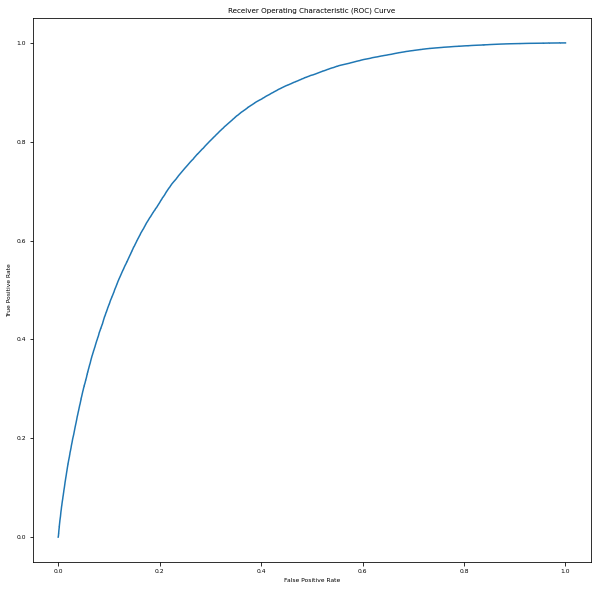

In [25]:
# Plot the ROC curve
mplt.plot(fpr, tpr)
mplt.xlabel('False Positive Rate')
mplt.ylabel('True Positive Rate')
mplt.title('Receiver Operating Characteristic (ROC) Curve')
mplt.show()

In [26]:
# Predict probabilities for the positive class
optimal_threshold=.47
y_pred_prob_train = model.predict_proba(x_train)[:, 1]

# Apply the optimum threshold to obtain binary predictions on training set
y_pred_train = (y_pred_prob_train >= optimal_threshold).astype(int)
y_pred_train

# to  obtain binary predictions on training set
y_pred_prob_test = model.predict_proba(x_test)[:, 1]
y_pred_test = (y_pred_prob_test >= optimal_threshold).astype(int)
y_pred_test


C:\Users\Saheli\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\Users\Saheli\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array([0, 0, 0, ..., 0, 0, 0])

In [27]:

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of test data:", accuracy_test)
print("Accuracy of train data:", accuracy_train)

# Calculate precision
precision = precision_score(y_test, y_pred_test)

# Calculate recall
recall = recall_score(y_test, y_pred_test)

print("Precision:", precision)
print("Recall:", recall)

Accuracy of test data: 0.7480275044519257
Accuracy of train data: 0.7485376886381657
Precision: 0.7021745721136621
Recall: 0.7480913789053324


### Decision tree

In [28]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(min_samples_leaf=5)

In [29]:
# Define the parameter grid
#param_grid = {'ccp_alpha': np.linspace(0, .1, num=10)}

# Perform grid search cross-validation
#grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
#grid_search.fit(x_train, y_train)


In [30]:
# Extract the cross-validation results
#cv_results = grid_search.cv_results_
#alphas = cv_results['param_ccp_alpha'].data.astype(float)
#mean_scores = cv_results['mean_test_score']

In [31]:
# Plot the cross-validation error graph
#mplt.plot(alphas, 1 - mean_scores)
#mplt.xlabel('Cost Complexity Parameter (alpha)')
#mplt.ylabel('Cross-Validation Error')
#mplt.title('Cross-Validation Error vs. Cost Complexity Parameter')
#mplt.grid(True)
#mplt.show()

In [32]:
#pruning tree
path = clf.cost_complexity_pruning_path(x_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.        , 0.        , ..., 0.01598759, 0.02048046,
       0.07106037])

In [33]:
#plotting accuracy and precision against alphas
accuracy_train,accuracy_test,pre_train,pre_test =[],[],[],[]

for i in alphas[1:13613:300]:
    clf = DecisionTreeClassifier(ccp_alpha=i,random_state=123,min_samples_leaf=5)
    
    clf.fit(x_train,y_train)
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train,y_pred_train))
    accuracy_test.append(accuracy_score(y_test,y_pred_test))
    
    pre_train.append(precision_score(y_train,y_pred_train))
    pre_test.append(precision_score(y_test,y_pred_test))
    


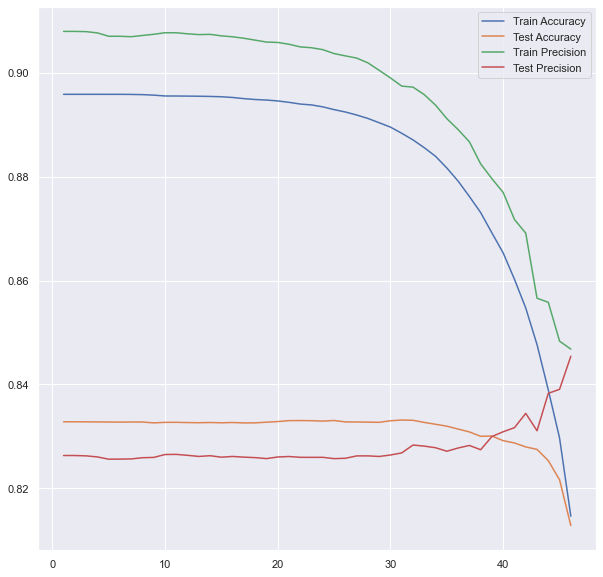

In [34]:
sns.set()
sns.lineplot(y=accuracy_train,x=np.arange(1,47,1),label='Train Accuracy')
sns.lineplot(y=accuracy_test,x=np.arange(1,47,1),label='Test Accuracy')
sns.lineplot(y=pre_train,x=np.arange(1,47,1),label='Train Precision')
sns.lineplot(y=pre_test,x=np.arange(1,47,1),label='Test Precision')
mplt.show()

In [35]:
clf_final = DecisionTreeClassifier(ccp_alpha=0.00,random_state=123,min_samples_leaf=5)

In [36]:
clf_final.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=5, random_state=123)

In [37]:
pred_train=clf_final.predict(x_train)
pred_test = clf_final.predict(x_test)

In [38]:
a_train = accuracy_score(y_train,pred_train)
a_test = accuracy_score(y_test,pred_test)

precision_train = precision_score(y_train,pred_train)
precision_test = precision_score(y_test,pred_test)

recall_train = recall_score(y_train,pred_train)
recall_test = recall_score(y_test,pred_test)

In [39]:
print('train accuracy:',a_train,'test_accuracy:',a_test,'test precision:',precision_test,'test recall:',recall_test)

train accuracy: 0.895831437744531 test_accuracy: 0.8328155667918838 test precision: 0.8263225965387695 test recall: 0.7879375146817007


[Text(0.5, 0.9, 'HighBP <= 0.5\ngini = 0.494\nsamples = 307732\nvalue = [170826, 136906]'),
 Text(0.25, 0.7, 'GenHlth <= 2.5\ngini = 0.365\nsamples = 141343\nvalue = [107368, 33975]'),
 Text(0.125, 0.5, 'Age <= 2.5\ngini = 0.226\nsamples = 82865\nvalue = [72130, 10735]'),
 Text(0.0625, 0.3, 'GenHlth <= 1.5\ngini = 0.163\nsamples = 62283\nvalue = [56702, 5581]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'BMI <= 27.002\ngini = 0.375\nsamples = 20582\nvalue = [15428, 5154]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'Age <= 1.5\ngini = 0.479\nsamples = 58478\nvalue = [35238, 23240]'),
 Text(0.3125, 0.3, 'BMI <= 37.007\ngini = 0.238\nsamples = 9214\nvalue = [7941, 1273]'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Text(0.4375, 0.3, 'BMI <= 27.001\ngini = 0.494\nsamples = 49264\nvalue = [27297, 21967]'),
 Text(0.40625, 0.1, '\n  (...)  \n'),
 Text(0.4

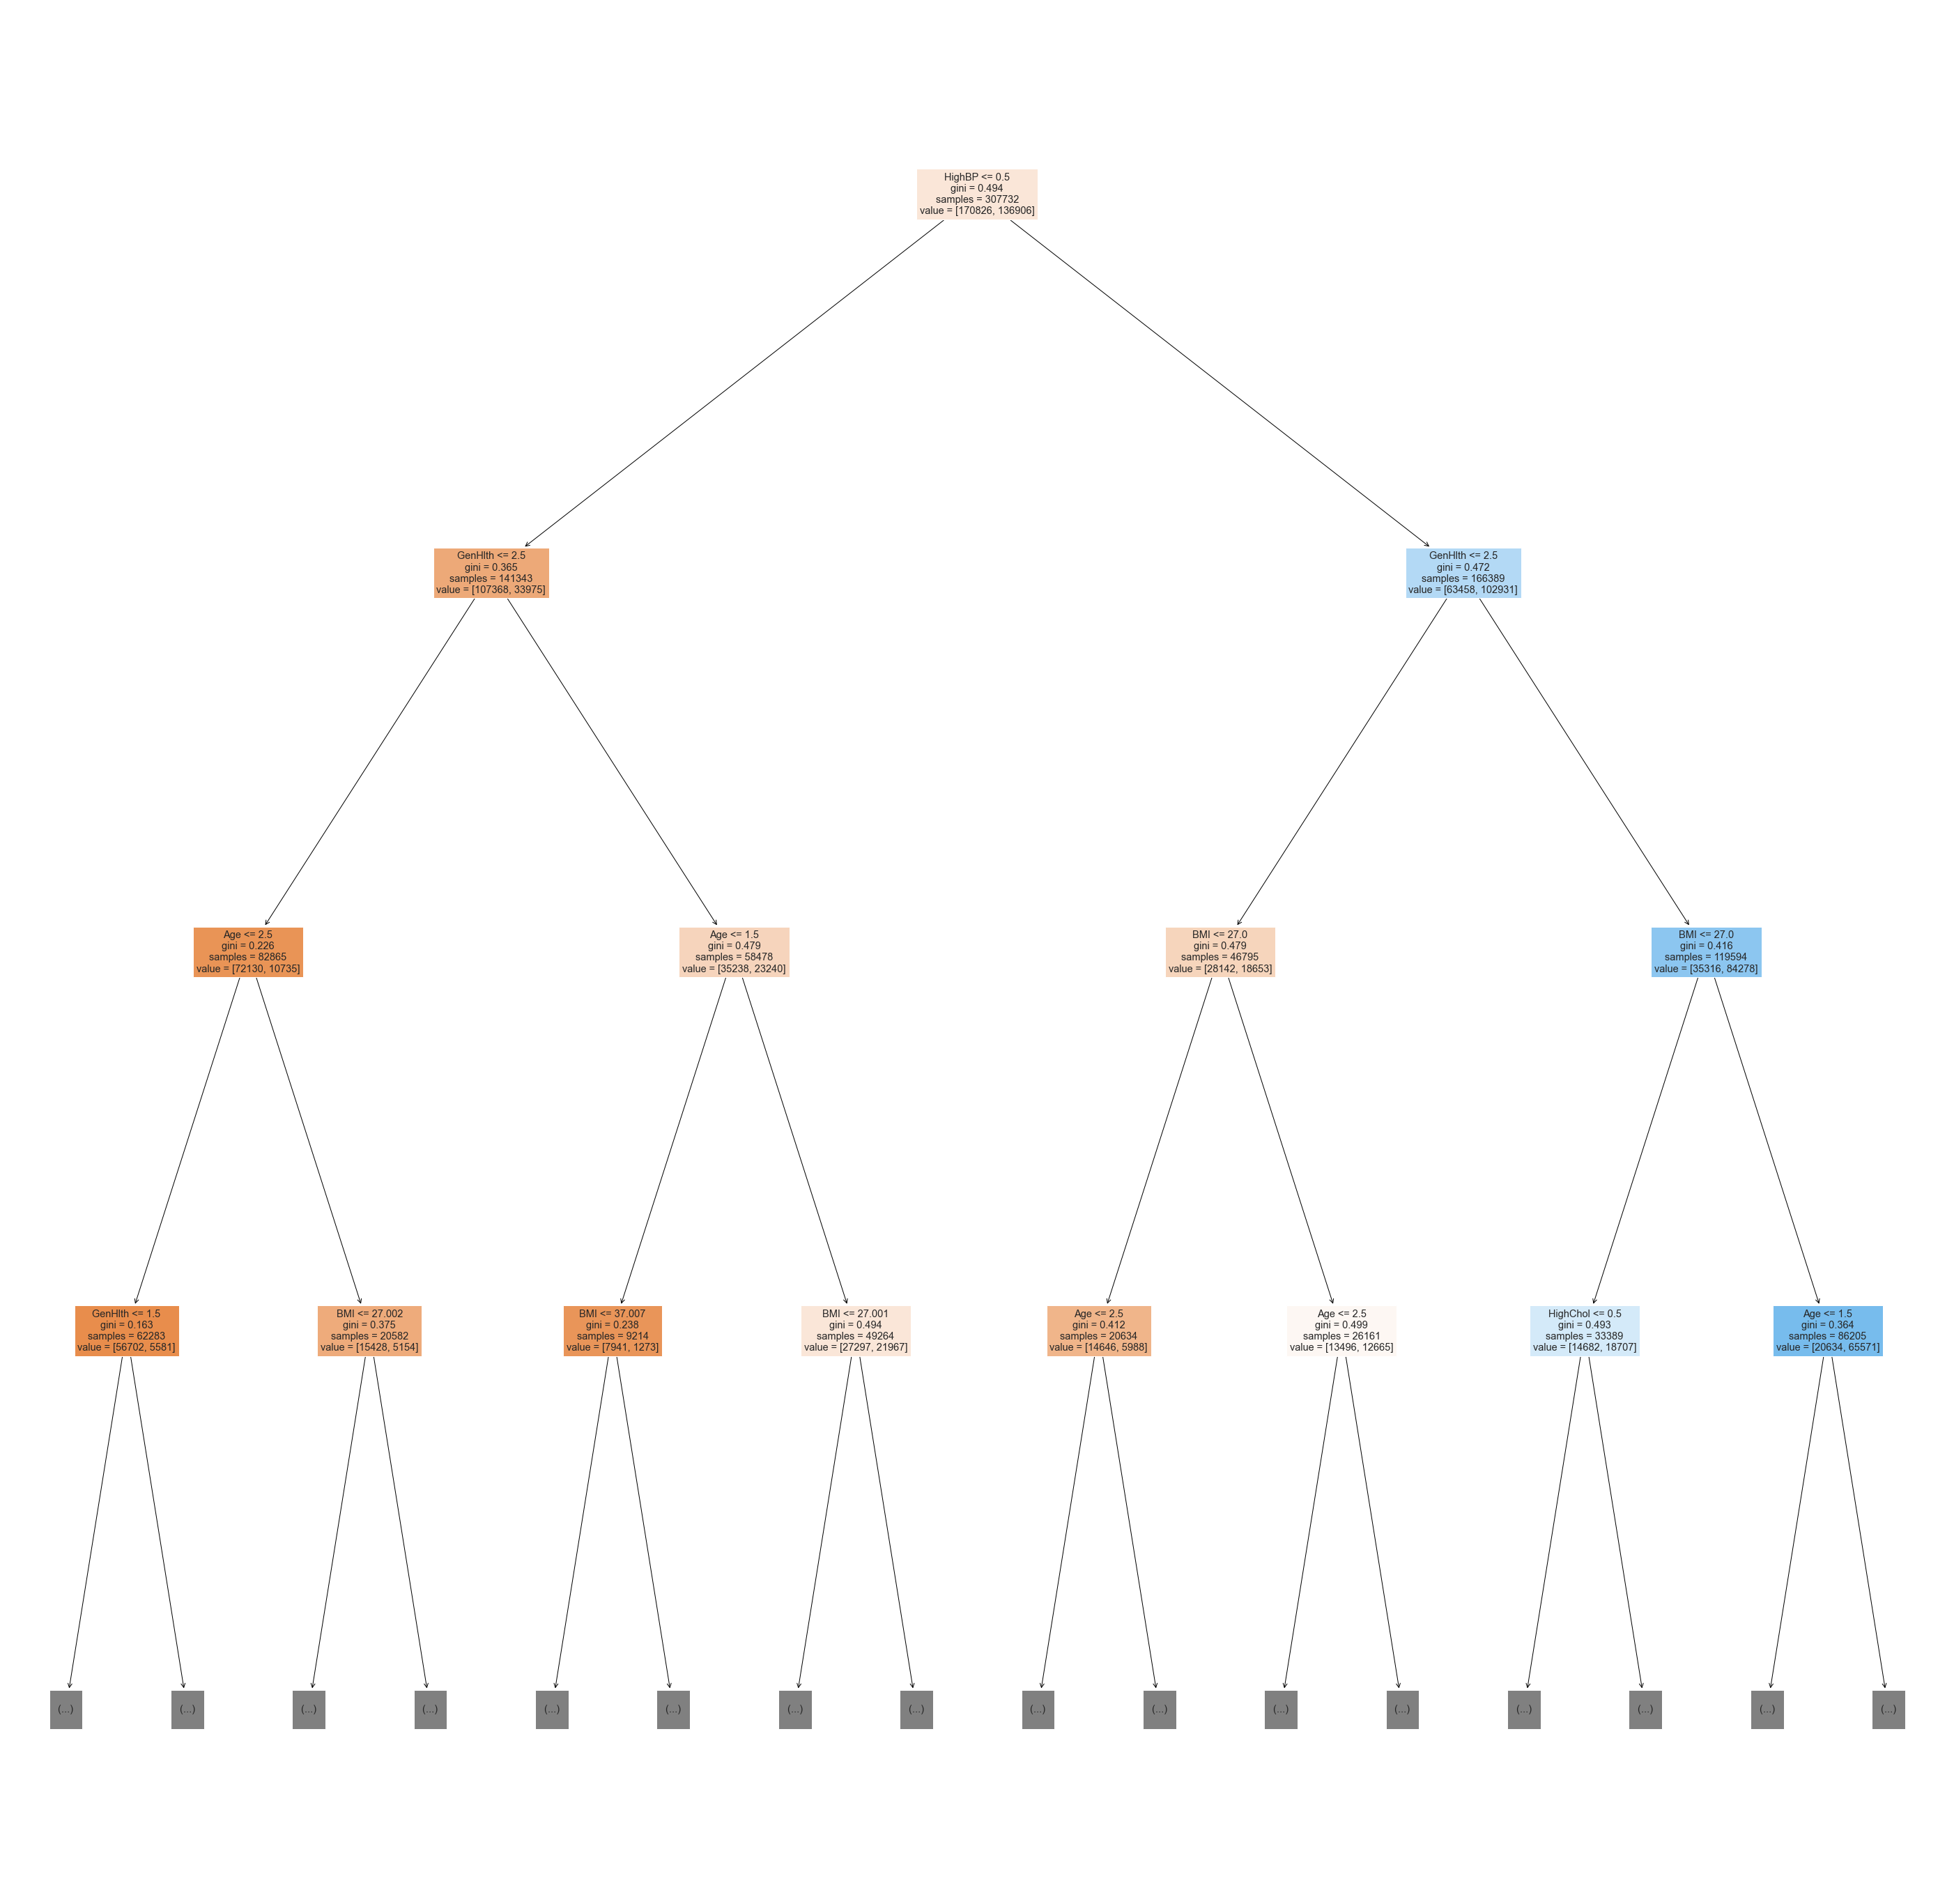

In [40]:
#visualising tree
fig = mplt.figure(figsize=(50,50))
plot_tree(clf_final.fit(x_train,y_train),max_depth=3,feature_names=list(x_train.columns),filled=True)

<AxesSubplot:>

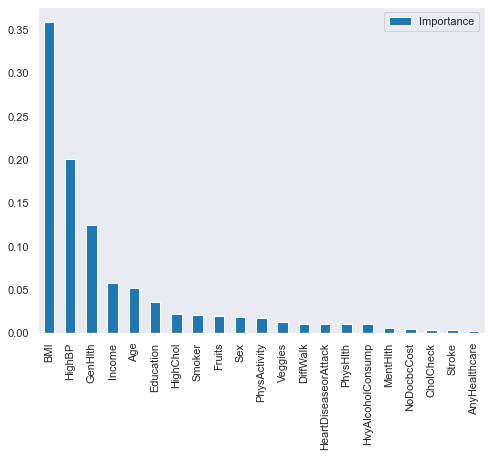

In [41]:
#important features
feat_importances = pd.DataFrame(clf_final.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

In [42]:
#modelling with only imp features
x_train_imp = x_train[['BMI','HighBP','GenHlth','Income','Age','Education','HighChol','Smoker']]
x_test_imp = x_test[['BMI','HighBP','GenHlth','Income','Age','Education','HighChol','Smoker']]

clf_imp=DecisionTreeClassifier(ccp_alpha=0.00,random_state=123,min_samples_leaf=5)
clf_imp.fit(x_train_imp,y_train)

pred_train_imp=clf_imp.predict(x_train_imp)
pred_test_imp= clf_imp.predict(x_test_imp)

a_train_imp = accuracy_score(y_train,pred_train_imp)
a_test_imp = accuracy_score(y_test,pred_test_imp)

precision_test_imp = precision_score(y_test,pred_test_imp)

recall_test_imp = recall_score(y_test,pred_test_imp)

print('train accuracy:',a_train_imp,'test_accuracy:',a_test_imp,'test precision:',precision_test_imp,'test recall:',recall_test_imp)

train accuracy: 0.8620357973821378 test_accuracy: 0.8272652827785215 test precision: 0.8354602138726456 test recall: 0.759337561663143


[Text(0.4888392857142857, 0.9285714285714286, 'HighBP <= 0.5\ngini = 0.494\nsamples = 307732\nvalue = [170826, 136906]'),
 Text(0.24888392857142858, 0.7857142857142857, 'GenHlth <= 2.5\ngini = 0.365\nsamples = 141343\nvalue = [107368, 33975]'),
 Text(0.13616071428571427, 0.6428571428571429, 'Age <= 2.5\ngini = 0.226\nsamples = 82865\nvalue = [72130, 10735]'),
 Text(0.07142857142857142, 0.5, 'GenHlth <= 1.5\ngini = 0.163\nsamples = 62283\nvalue = [56702, 5581]'),
 Text(0.03571428571428571, 0.35714285714285715, 'BMI <= 28.012\ngini = 0.055\nsamples = 23039\nvalue = [22389, 650]'),
 Text(0.017857142857142856, 0.21428571428571427, 'BMI <= 23.008\ngini = 0.041\nsamples = 18711\nvalue = [18320, 391]'),
 Text(0.008928571428571428, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.026785714285714284, 0.07142857142857142, '\n  (...)  \n'),
 Text(0.05357142857142857, 0.21428571428571427, 'BMI <= 28.978\ngini = 0.113\nsamples = 4328\nvalue = [4069, 259]'),
 Text(0.044642857142857144, 0.0714285714285

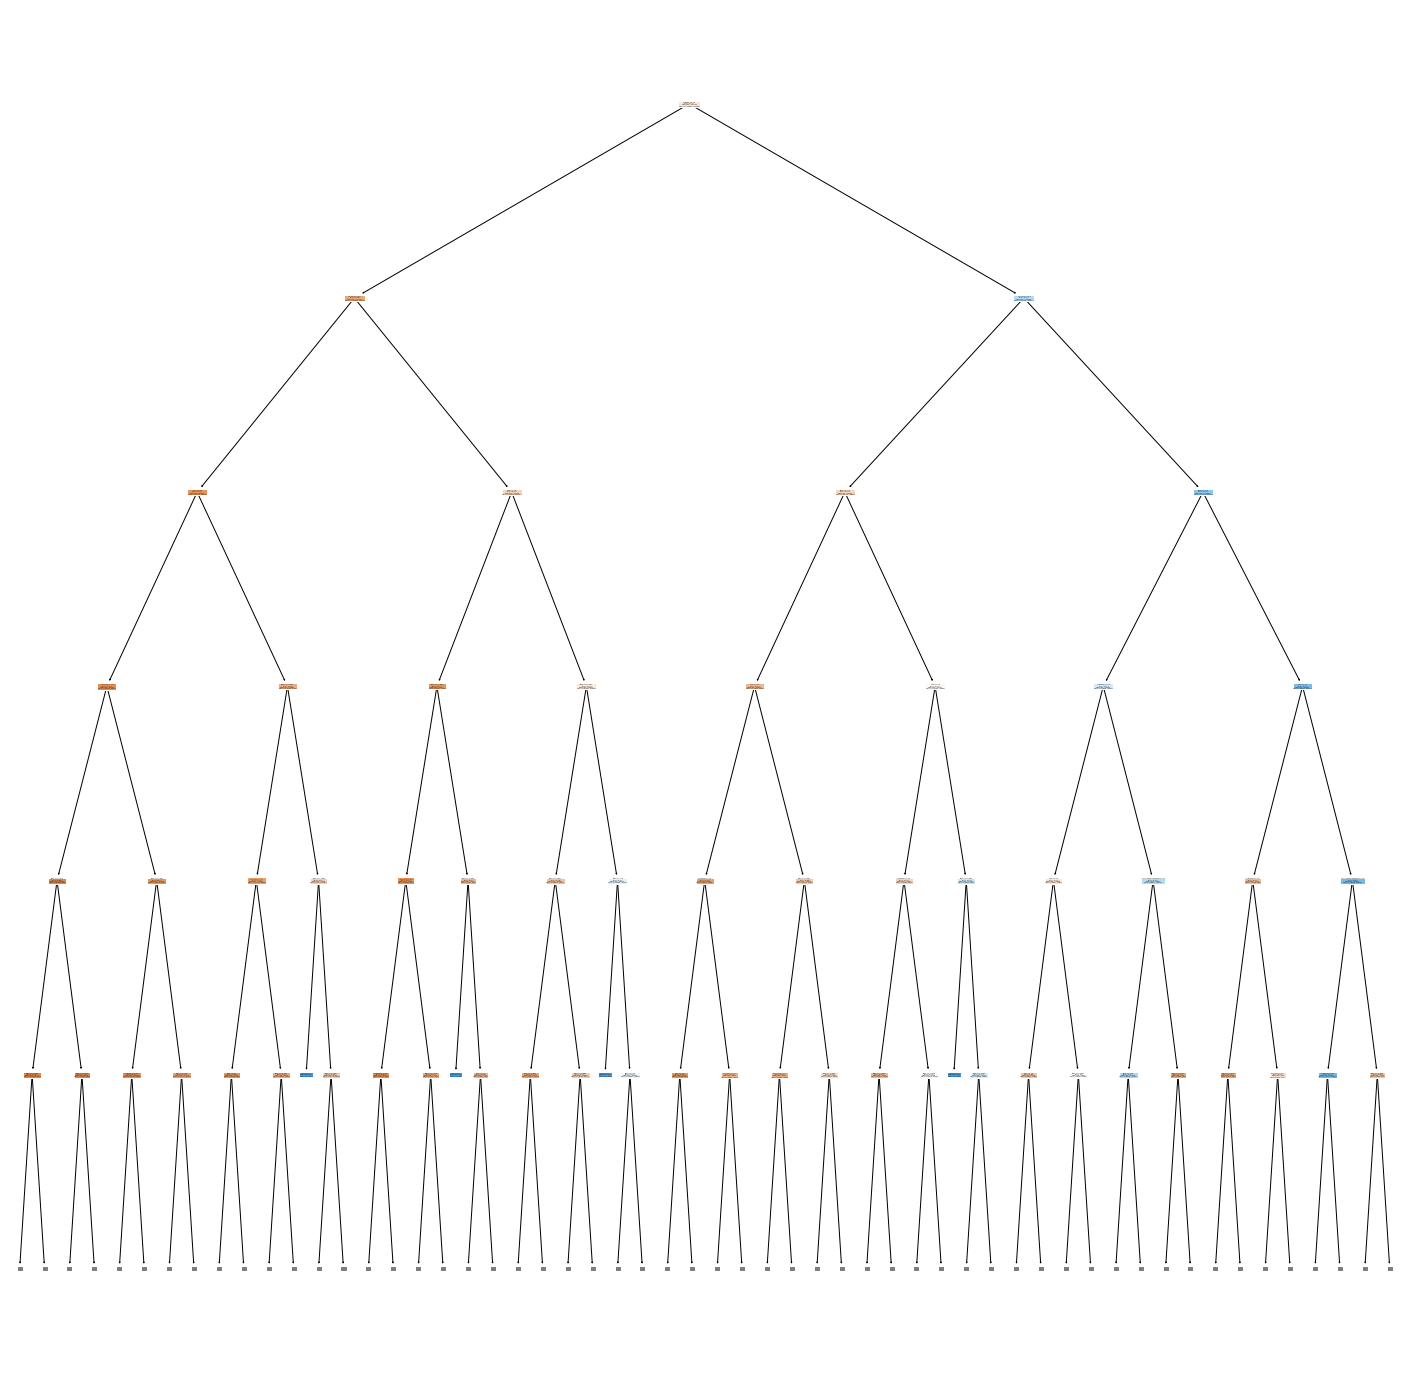

In [43]:
#visualising tree
fig = mplt.figure(figsize=(25,25))
plot_tree(clf_final.fit(x_train,y_train),max_depth=5,feature_names=list(x_train.columns),filled=True)

### Random Forest

In [44]:
rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=5,max_features='sqrt',ccp_alpha=0)

In [45]:
rf.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=150)

In [46]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [47]:
a_test=accuracy_score(y_test,y_pred_test)
a_train=accuracy_score(y_train,y_pred_train)

recision_test = precision_score(y_test,y_pred_test)

recall_test = recall_score(y_test,y_pred_test)

print('train accuracy:',a_train,'test_accuracy:',a_test,'test precision:',precision_test,'test recall:',recall_test)

train accuracy: 0.857447389286782 test_accuracy: 0.8205191530292593 test precision: 0.8263225965387695 test recall: 0.8128964059196617


### KNN

In [94]:
knn = KNeighborsClassifier()

In [95]:
#one hot encoding
x_ohe = pd.get_dummies(x_res)

In [96]:
#scaling
x_ohe_scaled = scalar().fit_transform(x_ohe)

In [97]:
x_ohe_train, x_ohe_test, y_ohe_train, y_ohe_test = train_test_split(x_ohe_scaled, y_res, test_size=0.2, random_state=123)

In [101]:
k_values = np.arange(1,31)
score_cross=[]

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x_ohe_train, y_ohe_train, cv=5)
    mean=np.mean(score)
    score_cross.append(mean)


KeyboardInterrupt



In [100]:
knn=KNeighborsClassifier(n_neighbors=2)
cross_val_score(knn, x_ohe_train, y_ohe_train, cv=5)

array([0.7989179 , 0.79620453, 0.79811848, 0.7962987 , 0.7979235 ])